### Imports

In [46]:
from math import exp
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.datasets import make_classification
from packages.LogisticRegression.LogisticRegression import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import pandas as pd
from sklearn.metrics import recall_score

# 1. K-nearest Neighbor Classifier
### 1.1. Model Definition
Non-parametric, no model, no learning.

- Given $X_{new}$, find its k-nearest neighbors according to some distance measure
    - Euclidean distance: $(X_i-X_{new})^T(X_i-X_{new})$
- Classify $X_{new}$ as the majority vote, based on the labels of these neighbors

# 2. Naïve Bayes Classifier
### 2.1. Model Definition
Model assumes all features are conditionally independent.

$$P(Y|X_1,\ldots,X_n)=\frac{P(Y)\prod_{i=1}^n P(X_i|Y)}{P(X_1,\dots,X_n)}$$


where 
- $X$ is a feature for a given sample. 
- $n$ is the total number of samples.
- $Y$ is the label for a given sample.


#### Subcomponents


$P(Y)=\pi^Y(1-\pi)^{1-Y}$

where 
- $\pi$ is a parameter defining $P(Y=1)$ and must be learned.

***
If $X_i$ is discrete, $P(X_i|Y)$ follows a Multinoulli distribution:

$P(X_i=k|Y=j)=\prod_k \theta_{ijk}^{(1-\delta(X_i,k))}$

where 
- $\delta(X_i,k)$ is an indicator function which takes value 1 if $X_i=k$ and value 0 otherwise.
- $k$: The number of possible values for a given feature.
***



If $X_i$ is continuous, $P(X_i|Y)$ follows a Gaussian distribution:

$P(X_i|Y)\sim N(\mu_i,\sigma_i^2)$

where 
- $\mu_i$ and $\sigma_i^2$ are parameters which must be learned. 
***
$P(X_1,\dots,X_n)$

where

$P(X_1,\dots,X_n)=P(Y=0)\sum_{i=1}^n P(X_i|Y=0)+P(Y=1)\sum_{i=1}^n P(X_i|Y=1)$

### 2.3. MLE for Naïve Bayes

$$\pi=\frac{s_1}{n}$$

where 
- $s_1$: number of samples with $Y=1$
- $n$: total number of samples

***

$$\theta_{ijk}=\frac{s_{1,k}}{s_1}$$

where
- $s_{1,k}$: number of samples with $X_i=k,Y=1$

In [37]:
# Given $X_{new}$:
# - Compute $P(Y=1)\prod_{i=1}^nP(X_j=X_{j_{new}}|Y=1)$
# - Compute $P(Y=0)\prod_{i=1}^nP(X_j=X_{j_{new}}|Y=0)$
# - Classify $X_{new}$ as the label with the higher probability.

### 2.4. MAP estimation for Naïve Bayes

$$\pi=\frac{s_1+\alpha_0}{n+\alpha_0 + \beta_0}$$

where 
- $s_1$: number of samples with $Y=1$
- $n$: total number of samples
- $\alpha_0$:
- $\beta_0$:

***

$$\theta_{ijk}=\frac{s_{1,k}+\alpha_{ijk0}}{s_1+\alpha_{ijk0}+\beta_{ijk0}}$$

where
- $s_{1,k}$: number of samples with $X_i=k,Y=1$
- $\alpha_{ijk0}$:
- $\beta_{ijk0}$:

# 3. Logistic Regression
### 3.1. Model Definition (two class)
Transforms continuous value from linear regression into discrete values for output.

$$P(Y=0|X=\{X_1,\ldots, X_n\})=\frac{1}{1+\exp{(w_0 + \sum_{i=1}^n w_iX_i)}}$$

$$P(Y=1|X=\{X_1,\ldots, X_n\})=\frac{\exp{(w_0 + \sum_{i=1}^n w_iX_i)}}{1+\exp{(w_0 + \sum_{i=1}^n w_iX_i)}}$$

### 3.2. MCLE for Logistic Regression (two class)
We want to use MCLE to learn the model parameters. MCLE cannot be solved in closed-form with respect to $W$.

$$\hat{W}_{MCLE}=\underset{W}{argmax} \prod_l P(Y^l|X^l,W)$$

where
- $l$: number of training examples

### 3.3. MCLE  for Logistic Regression (two class) with Gradient Descent
Parameters can be derived using gradient descent because logistic regression is concave. Start with a random initialization of parameters. Repeat until the change is less than $\epsilon$, that is, until $l(W)_t - l(W)_{t-1} < \epsilon$.

$$l(W)=\sum_l \left(Y^l(w_0+\sum_i^n w_i X^l_i)-ln(1+exp(w_0+\sum_i^n w_i X^l_i)) \right)$$

$$w_i \leftarrow w_i + \eta \nabla(W) $$

where 
- $\eta$ is step size (learning rate)
- $X_i^l$: value of $X_i$ for the $l$th training example.
- $\nabla(W)$ is the gradient

***

#### Subcomponents

$\nabla(W)=\frac{\partial l(W)}{\partial w_i}=\sum_l X^l_i\left(Y^l-\hat{P}(Y^l=1|X^l,W)\right)$

where
- $Y^l-\hat{P}(Y^l=1|X^l,W)$ is the prediction error
- $\hat{P}(Y^l=1|X^l,W)=\frac{exp(w_0+\sum_iw_iX_i)}{1+exp(w_0+\sum_iw_iX_i)}$


According to Mitchell, we accommodate weight $w_0$ by assuming an imaginary $X_0=1$ for all $l$.
***


Pattern for gradient:

$$\frac{\partial l(W)}{\partial w_0}=\sum_l 1 (Y^l - P(Y^l=1|X^l,W))$$

$$\frac{\partial l(W)}{\partial w_1}=\sum_l X_1^l (Y^l - P(Y^l=1|X^l,W))$$

$$\vdots$$

$$\frac{\partial l(W)}{\partial w_n}=\sum_l X_n^l (Y^l - P(Y^l=1|X^l,W))$$

In [38]:
#?? need to mean center data?
#?? when to add imaginary 1 row?
#?? how to accommodate w_0? Assume extra x row of all 1's? best way?
#?? how to choose epsilon
#?? absolute value of difference

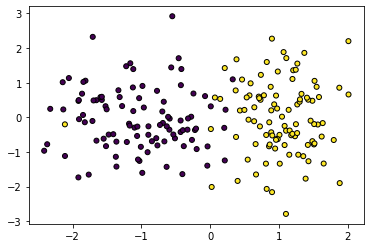

In [54]:
X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, n_samples=200)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1,
            s=25, edgecolor='k')
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

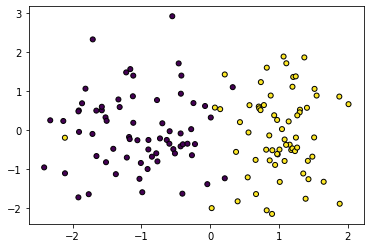

In [56]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k')
plt.show()

In [57]:
model = LogisticRegression(eta=0.01,epsilon=0.01)
model.fit(X_train,y_train)
model.weights

count of rounds 69


array([-0.2803389 ,  3.82658932, -0.11839254])

In [43]:
# source: https://stackoverflow.com/questions/31292393/how-do-you-draw-a-line-using-the-weight-vector-in-a-linear-perceptron
def plot_data(inputs,targets,weights):
    # fig config
    plt.figure(figsize=(10,6))
    plt.grid(True)

    #plot input samples(2D data points) and i have two classes. 
    #one is +1 and second one is -1, so it red color for +1 and blue color for -1
    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Here i am calculating slope and intercept with given three weights
    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
        plt.plot(i, y, 'k.')

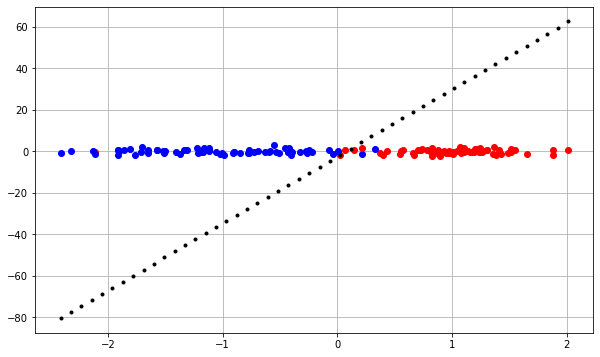

In [58]:
plot_data(X_train,y_train,model.weights)

Better way, from https://stackoverflow.com/questions/31292393/how-do-you-draw-a-line-using-the-weight-vector-in-a-linear-perceptron.

```
Plug your weights into the general form (w0 + w1x + w2y = 0) and solve for x, x=0, y, y=0:

x = -(w0 - w2y)/w1  
x = 0 when y = -w0/w2  
y = -(w0 - w1x)/w2  
y = 0 when x = -w0/w1  
Now we have two points that lie on the line: (0, -w0/w2) and (-w0/w1, 0)

slope = -(w0/w2)/(w0/w1)  
intercept = -w0/w2
```

In [60]:
# test accuracy
y_pred_proba = model.predict_proba(X_test)
print(log_loss(y_test,y_pred_proba))
y_pred = model.predict(X_test)
score = recall_score(y_test, y_pred, average='weighted')
print(score)

0.10503817229936341
0.9545454545454546


### 3.4. MAP estimation  for Logistic Regression (two class) with Gradient Descent
Regularization term helps reduce overfitting, especially when training data is sparse.

$$l(W)=?$$

$$w_i \leftarrow w_i -\eta\lambda w_i + \eta \sum_l X^l_i\left(Y^l-\hat{P}(Y^l=1|X^l,W)\right) $$

where
- $\lambda$ is a regularization term, $\lambda=\frac{1}{2\sigma^2}$

### 3.5. Model Definition (multiclass)
Logistic Regression for more than two classes. Learn $R-1$ set of weights.

For $k<R$:

$$P(Y=y_k|X=\{X_1,\ldots, X_n\})=\frac{\exp{(w_{k,0} + \sum_{i=1}^n w_{k,i}X_i)}}{1+\sum_{j=1}^{R-1}\exp{(w_{j,0} + \sum_{i=1}^n w_{ji}X_i)}}$$

where
- $R$: number of classes

***

For $k=R$:

$$P(Y=y_R|X=\{X_1,\ldots, X_n\})=\frac{1}{1+\sum_{j=1}^{R-1}\exp{(w_{j,0} + \sum_{i=1}^n w_{ji}X_i)}}$$

# one vs all approach
One-vs-all is a strategy that involves training N distinct binary classifiers, each designed to recognize a specific class. After that we collectively use those N classifiers to predict the correct class.

In [34]:
# def get_line(sample_length, coverage, df):
#     data = df[(df['sample_length'] == sample_length) & (df['coverage']==coverage)].drop(['sample_length', 'coverage'],axis=1)
#     return data['k'].tolist(), data['score'].tolist()


# def plot_graphs(filename):
    
#     df = pd.read_csv(filename)
#     df = df.drop(['experiment','category','classifier','training shape', 'score type', 'max_depth','n_estimators'],axis=1)
   
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
# #     fig.tight_layout()

#     # graph 1
#     L=100
#     line_L100_C0_1_k, line_L100_C0_1_score = get_line(L, 0.1, df)
#     line_L100_C1_k, line_L100_C1_score = get_line(L, 1, df)
#     line_L100_C10_k, line_L100_C10_score = get_line(L, 10, df)
#     line_L100_C100_k, line_L100_C100_score = get_line(L, 100, df)
#     line_L100_C400_k, line_L100_C400_score = get_line(L, 400, df)
    
#     ax1.plot(line_L100_C0_1_k, line_L100_C0_1_score, linestyle='-', label='cov=0.1',color='k')
#     ax1.plot(line_L100_C1_k, line_L100_C1_score, linestyle='--', label='cov=1',color='k')
#     ax1.plot(line_L100_C10_k, line_L100_C10_score, linestyle='-', label='cov=10',color='gray')
#     ax1.plot(line_L100_C100_k, line_L100_C100_score, linestyle=':', label='cov=100',color='gray')
#     ax1.plot(line_L100_C400_k, line_L100_C400_score, linestyle='-.', label='cov=400',color='k')

#     ax1.set_xticks([0, 1, 2,4,6,8,10,12])
#     ax1.legend()
#     ax1.set_title('L=100')
#     ax1.set_ylabel('average species-level recall')
#     ax1.set_xlabel('k-mer size')
#     ax1.grid(color='lightgray', linestyle=':', linewidth=1)
    
#     # graph 2
#     L=200
#     line_L100_C0_1_k, line_L100_C0_1_score = get_line(L, 0.1, df)
#     line_L100_C1_k, line_L100_C1_score = get_line(L, 1, df)
#     line_L100_C10_k, line_L100_C10_score = get_line(L, 10, df)
#     line_L100_C100_k, line_L100_C100_score = get_line(L, 100, df)
#     line_L100_C400_k, line_L100_C400_score = get_line(L, 400, df)
    
    
#     ax2.plot(line_L100_C0_1_k, line_L100_C0_1_score, linestyle='-', label='cov=0.1',color='k')
#     ax2.plot(line_L100_C1_k, line_L100_C1_score, linestyle='--', label='cov=1',color='k')
#     ax2.plot(line_L100_C10_k, line_L100_C10_score, linestyle='-', label='cov=10',color='gray')
#     ax2.plot(line_L100_C100_k, line_L100_C100_score, linestyle=':', label='cov=100',color='gray')
#     ax2.plot(line_L100_C400_k, line_L100_C400_score, linestyle='-.', label='cov=400',color='k')

#     ax2.set_xticks([0, 1, 2,4,6,8,10,12])
#     ax2.legend()
#     ax2.set_title('L=200')
#     ax2.set_ylabel('average species-level recall')
#     ax2.set_xlabel('k-mer size')
#     ax2.grid(color='lightgray', linestyle=':', linewidth=1)
    
#     # graph 3
#     L=400
#     line_L100_C0_1_k, line_L100_C0_1_score = get_line(L, 0.1, df)
#     line_L100_C1_k, line_L100_C1_score = get_line(L, 1, df)
#     line_L100_C10_k, line_L100_C10_score = get_line(L, 10, df)
#     line_L100_C100_k, line_L100_C100_score = get_line(L, 100, df)
#     line_L100_C400_k, line_L100_C400_score = get_line(L, 400, df)

    
#     ax3.plot(line_L100_C0_1_k, line_L100_C0_1_score, linestyle='-', label='cov=0.1',color='k')
#     ax3.plot(line_L100_C1_k, line_L100_C1_score, linestyle='--', label='cov=1',color='k')
#     ax3.plot(line_L100_C10_k, line_L100_C10_score, linestyle='-', label='cov=10',color='gray')
#     ax3.plot(line_L100_C100_k, line_L100_C100_score, linestyle=':', label='cov=100',color='gray')
#     ax3.plot(line_L100_C400_k, line_L100_C400_score, linestyle='-.', label='cov=400',color='k')

#     ax3.set_xticks([0, 1, 2,4,6,8,10,12])
#     ax3.legend()
#     ax3.set_title('L=400')
#     ax3.set_ylabel('average species-level recall')
#     ax3.set_xlabel('k-mer size')
#     ax3.grid(color='lightgray', linestyle=':', linewidth=1)
    
#     plt.suptitle("Random Forest Classifier (max_depth=15, n_estimators=50)", fontsize=16)
#     plt.show()
    

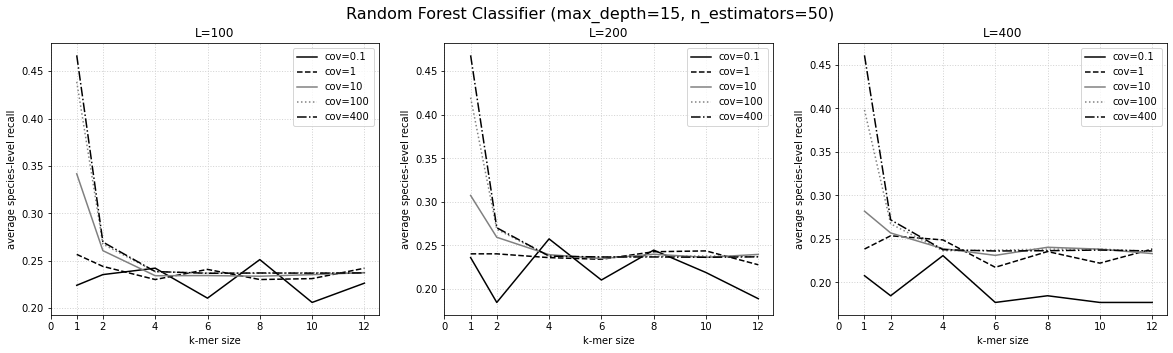

In [35]:
# filename='data/runs-10000/rf-multi.2021.04.06.21.33.27.csv'
# plot_graphs(filename)